In [142]:
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn import under_sampling, over_sampling


# Data Preprocessing 

In [143]:
df = pd.read_csv("C:\\Users\\trand\\Datathlon 2023\\Sepsis Data Set\\Final_data.csv")

df = df.sample(n=10000)


df["gender"] = (df["gender"] == "M").astype(int)

# One-hot encoding for ethnicities
df['race_source_value'] = pd.factorize(df['race_source_value'])[0]
# print(pd.factorize(df['race_source_value']))

# print the updated dataframe
print(df)
#print(df['concept_name'].value_counts()[1])
df = df.sample(n=10000)
top_disease = ["acute renal failure syndrome", "congestive heart failure", "atrial fibrillation", "essential hypertension", "urinary tract infectious disease"]

for disease in top_disease:
    df[disease] = df.apply(lambda row: 1 if disease.lower() in row["disease"].lower() else 0, axis=1)

seps = []
for d in df["disease"]:
    #print(d.lower())
    if "sepsis" in d.lower():
        seps.append(1)
    else:
        seps.append(0)

print(len(seps))
df["sepsis"] = seps

df = df.drop('disease', axis=1)
df = df.drop('person_id', axis=1)
cols = df.columns
df



       person_id                                            disease  gender   
2898   392778749                      Newborn, Requires vaccination       1  \
19003  392794856  Dysthymia, Postprocedural state finding, Essen...       0   
19448  392795301  Acute ST segment elevation myocardial infarcti...       0   
864    392776714  Essential hypertension, Disease of liver, Beni...       1   
3714   392779565  Newborn, Congenital anomaly of abdominal wall,...       1   
...          ...                                                ...     ...   
8029   392783881  Severe sepsis, Urinary tract infectious diseas...       1   
12808  392788660  Essential hypertension, Preinfarction syndrome...       1   
33595  392809449  Cardiac catheterization, Coronary arterioscler...       0   
43722  392819576  Diabetic ketoacidosis, Hyperosmolality and or ...       0   
37247  392813101  Viral hepatitis B without hepatic coma, Essent...       0   

       race_source_value  
2898                   0

,gender,race_source_value,acute renal failure syndrome,congestive heart failure,atrial fibrillation,essential hypertension,urinary tract infectious disease,sepsis
10822,1,0,0,0,0,1,0,0
26546,0,0,0,0,0,0,0,0
30706,0,0,0,0,1,1,0,0
19517,0,0,0,0,1,1,1,0
8500,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
2921,1,0,0,0,0,0,0,0
35268,1,0,0,0,0,0,0,0
20116,1,0,1,0,0,1,1,0
24563,1,0,1,0,0,1,0,1


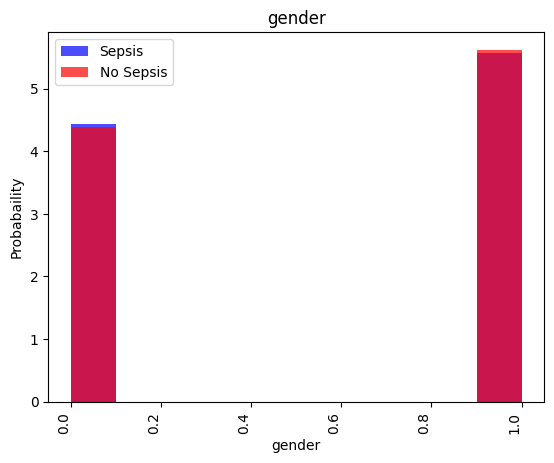

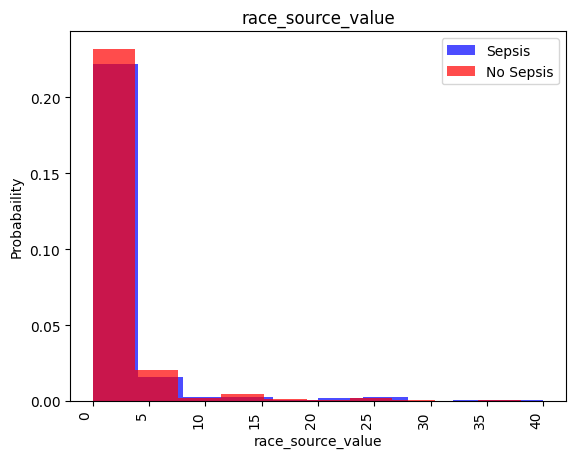

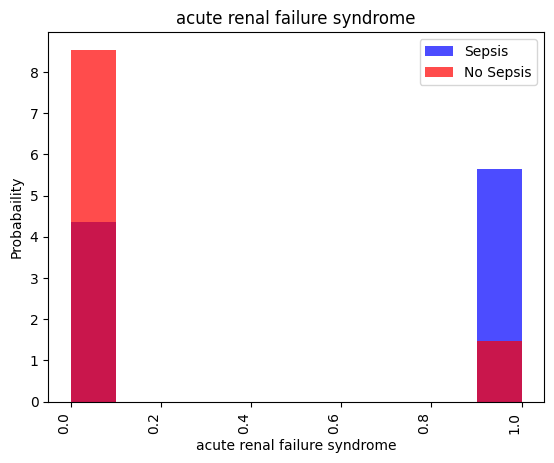

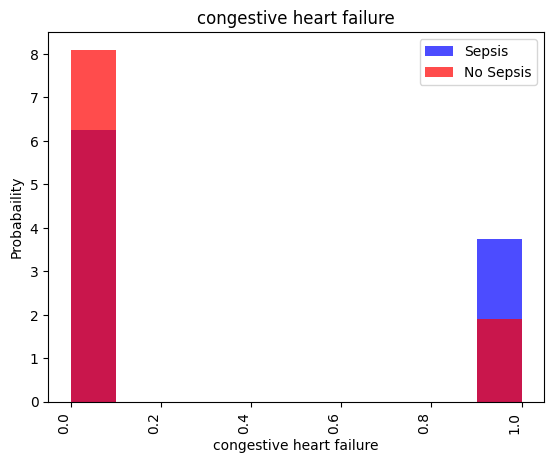

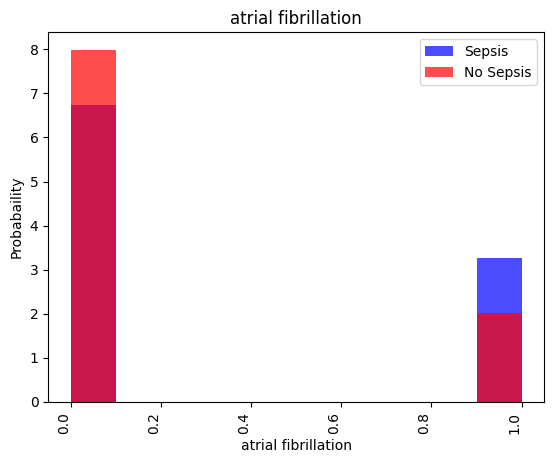

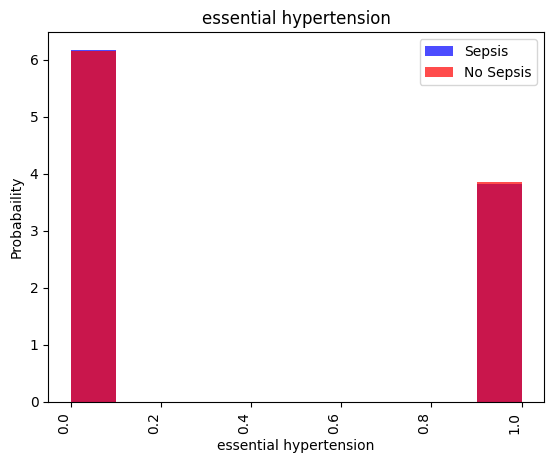

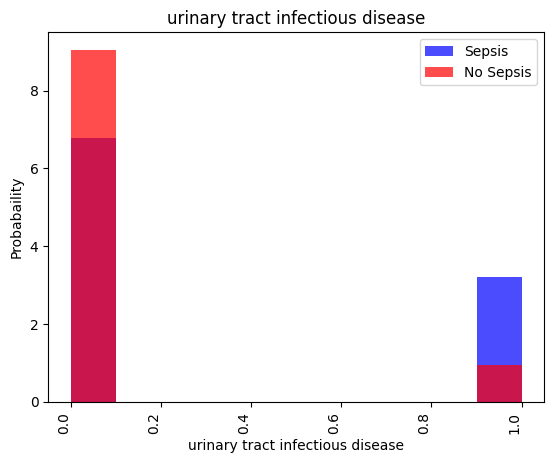

In [144]:
for label in cols[:-1]:
  plt.hist(df[df["sepsis"]==1][label], color='blue', label='Sepsis', alpha=0.7, density=True)
  plt.hist(df[df["sepsis"] == 0][label], color='red', label='No Sepsis', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probabaility")
  plt.xlabel(label)
  plt.xticks(rotation=90, ha='right')
  plt.legend()
  plt.show()

In [145]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


In [146]:
# scales inputs so that they are relative to mean and standrad deviation of specific columns
# note: upper case variable name refers to matrices while lower case variable names refer to 1D arrays
# oversample=True makes it so equal amounts of gamma and hadron are in the training datasets
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Convert labels to integers
    le = LabelEncoder()
    y = le.fit_transform(y)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (len(y), 1))))

    return data, X, y

In [147]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
# do not want to oversample because want to see if our model is accurate
test, X_test, y_test = scale_dataset(test, oversample=False) 

KNN Model Fit

In [148]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve


In [149]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [150]:
y_pred_knn = knn_model.predict(X_test)

In [151]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.16      0.27      1721
           1       0.15      0.90      0.25       279

    accuracy                           0.26      2000
   macro avg       0.53      0.53      0.26      2000
weighted avg       0.80      0.26      0.27      2000



In [152]:
print(accuracy_score(y_test, y_pred_knn))

0.2635


In [153]:
print(roc_auc_score(y_test, y_pred_knn))

0.5300067269383684


In [154]:
print(f1_score(y_test, y_pred_knn))

0.2541772151898734


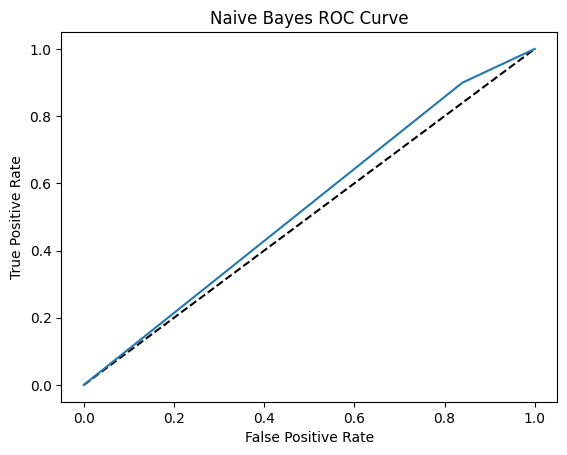

In [155]:
#Plotting roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.show()

Gaussian Naive Bayes Classifier

In [156]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
y_pred_GB = model.predict(X_test)

In [157]:
print("accuracy score")
print(accuracy_score(y_test, y_pred_GB))
print("classification_report")
print(classification_report(y_test, y_pred_GB))
print("f1_score")
print(f1_score(y_test, y_pred_GB))
print("roc score")
print(roc_auc_score(y_test, y_pred_GB))


accuracy score
0.718
classification_report
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      1721
           1       0.29      0.70      0.41       279

    accuracy                           0.72      2000
   macro avg       0.61      0.71      0.61      2000
weighted avg       0.85      0.72      0.76      2000

f1_score
0.40880503144654085
roc score
0.7100085596646112


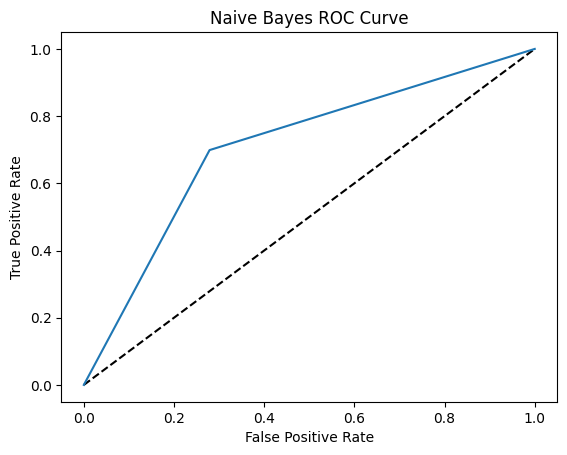

In [158]:
#Plotting roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_GB)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.show()

Random Forest Classification

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
clf = RandomForestClassifier(max_depth=3)

In [161]:
clf.fit(X_train, y_train)
y_pred_RF = clf.predict(X_test)


In [162]:
print("accuracy score")
print(accuracy_score(y_test, y_pred_RF))
print("classification_report")
print(classification_report(y_test, y_pred_RF))
print("f1_score")
print(f1_score(y_test, y_pred_RF))
print("roc score")
print(roc_auc_score(y_test, y_pred_RF))
print("feature important")
print(clf.feature_importances_)

accuracy score
0.757
classification_report
              precision    recall  f1-score   support

           0       0.93      0.77      0.85      1721
           1       0.32      0.66      0.43       279

    accuracy                           0.76      2000
   macro avg       0.63      0.72      0.64      2000
weighted avg       0.85      0.76      0.79      2000

f1_score
0.4322429906542056
roc score
0.7176539437977837
feature important
[0.00405909 0.02781053 0.52541866 0.13462358 0.05398676 0.00590872
 0.24819266]


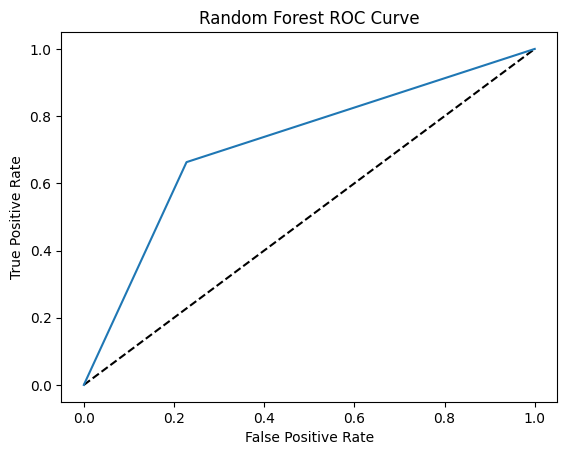

In [163]:
#Plotting roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [164]:
from sklearn.linear_model import LogisticRegression 

In [165]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred_LG = lg_model.predict(X_test)

In [166]:
print("accuracy score")
print(accuracy_score(y_test, y_pred_LG))
print("classification_report")
print(classification_report(y_test, y_pred_LG))
print("f1_score")
print(f1_score(y_test, y_pred_LG))
print("roc score")
print(roc_auc_score(y_test, y_pred_LG))
print(lg_model.coef_)

accuracy score
0.764
classification_report
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1721
           1       0.33      0.65      0.43       279

    accuracy                           0.76      2000
   macro avg       0.63      0.71      0.64      2000
weighted avg       0.85      0.76      0.79      2000

f1_score
0.4326923076923077
roc score
0.7142134168056831
[[ 0.03405879  0.03038924  0.72711005  0.12905562  0.1132406  -0.13542266
   0.40601289]]


SVM Model

In [167]:
from sklearn.svm import SVC


In [168]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [169]:
print("accuracy score")
print(accuracy_score(y_test, y_pred_svm))
print("classification_report")
print(classification_report(y_test, y_pred_svm))
print("f1_score")
print(f1_score(y_test, y_pred_svm))
print("roc score")
print(roc_auc_score(y_test, y_pred_svm))

accuracy score
0.7505
classification_report
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1721
           1       0.31      0.65      0.42       279

    accuracy                           0.75      2000
   macro avg       0.62      0.71      0.63      2000
weighted avg       0.84      0.75      0.78      2000

f1_score
0.4190919674039581
roc score
0.7063691402223014


XGBoost

In [170]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [171]:
xg_classifier = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3
    )
xg_classifier.fit(X_train, y_train)
y_pred_xg = xg_classifier.predict(X_test)

In [172]:
mse = mean_squared_error(y_pred_xg, y_test)
rmse = mse**(1/2)
rmse

0.4939635614091388

In [173]:
print(f1_score(y_test, y_pred_xg))
pd.DataFrame(xg_classifier.feature_importances_.reshape(1, -1), columns=df.columns[:-1])

0.4258823529411765


,gender,race_source_value,acute renal failure syndrome,congestive heart failure,atrial fibrillation,essential hypertension,urinary tract infectious disease
0,0.019507,0.01844,0.714429,0.049871,0.032284,0.028613,0.136855


In [174]:
xg_regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
    )
xg_regressor.fit(X_train, y_train)
y_pred_xg_regre = xg_regressor.predict(X_test)

In [175]:
mse = mean_squared_error(y_pred_xg, y_test)
print(mse**(1/2))
pd.DataFrame(xg_regressor.feature_importances_.reshape(1, -1), columns=df.columns[:-1])

0.4939635614091388


,gender,race_source_value,acute renal failure syndrome,congestive heart failure,atrial fibrillation,essential hypertension,urinary tract infectious disease
0,0.020298,0.019135,0.673894,0.051377,0.032631,0.02015,0.182515


Neural Network

In [176]:
import tensorflow as tf

In [177]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

# combination of the above two functions
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [178]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(7,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.005, batch size 32


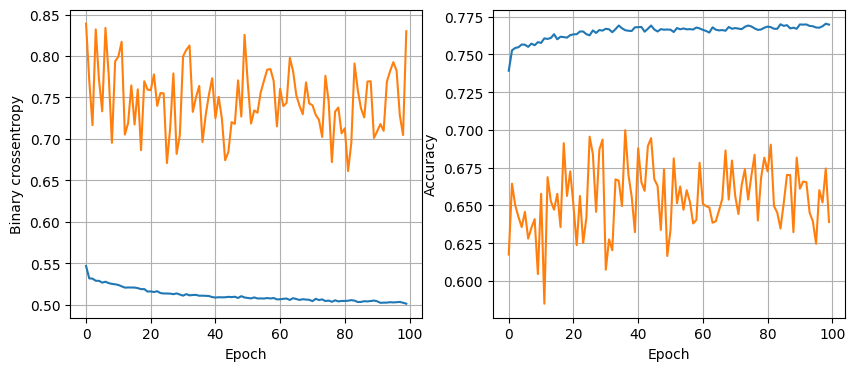

109/109 [==============================] - 0s 679us/step - loss: 0.7420 - accuracy: 0.7174
16 nodes, dropout 0, lr 0.005, batch size 64


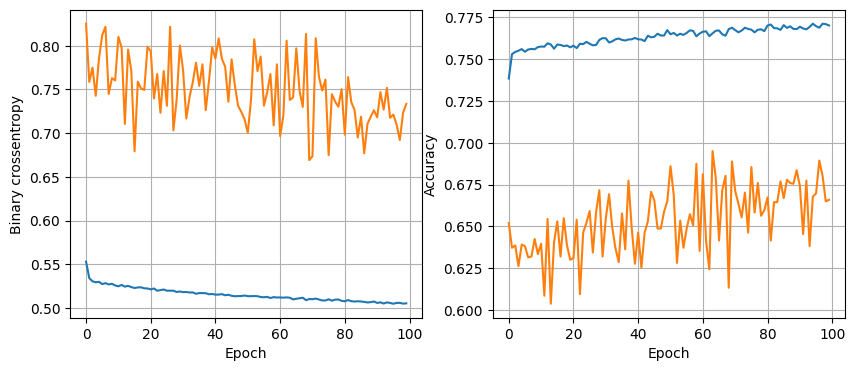

109/109 [==============================] - 0s 695us/step - loss: 0.6363 - accuracy: 0.7191
16 nodes, dropout 0, lr 0.005, batch size 128


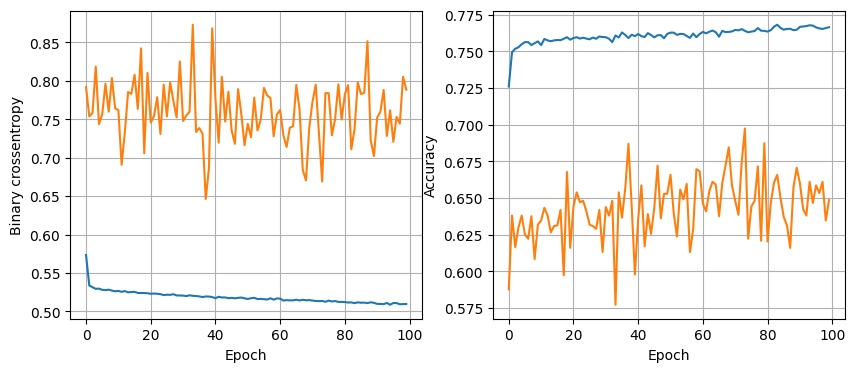

109/109 [==============================] - 0s 634us/step - loss: 0.6214 - accuracy: 0.7197
16 nodes, dropout 0, lr 0.001, batch size 32


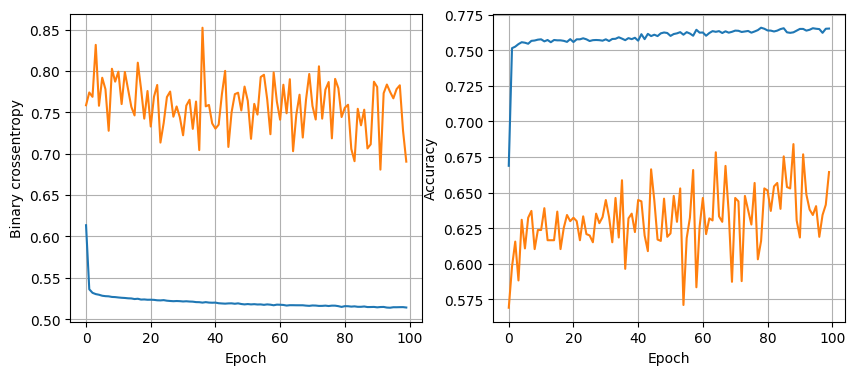

109/109 [==============================] - 0s 731us/step - loss: 0.5885 - accuracy: 0.7116
16 nodes, dropout 0, lr 0.001, batch size 64


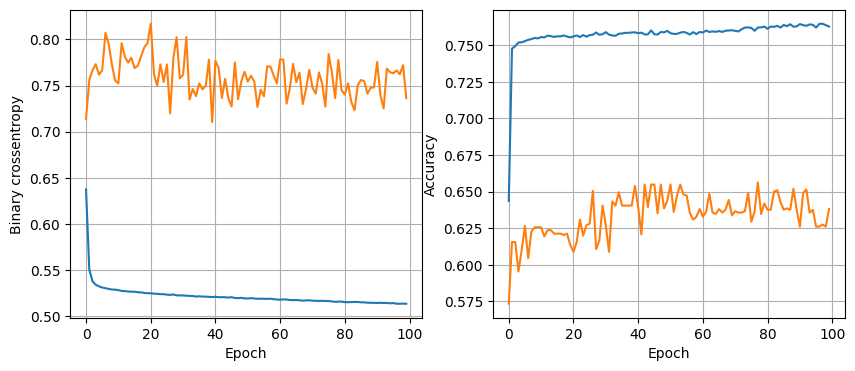

109/109 [==============================] - 0s 703us/step - loss: 0.5920 - accuracy: 0.7059
16 nodes, dropout 0, lr 0.001, batch size 128


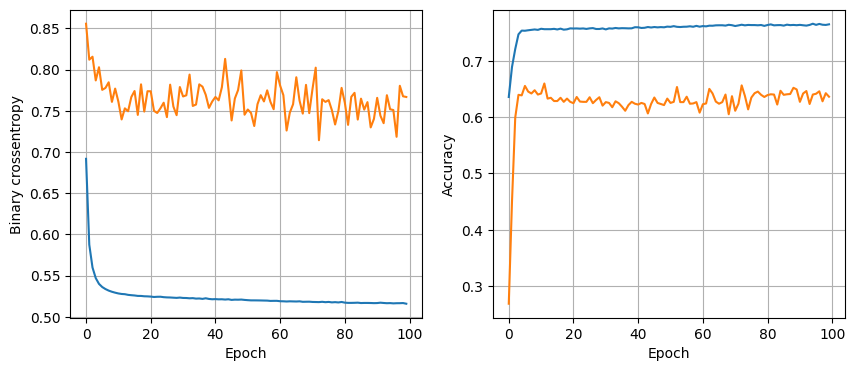

109/109 [==============================] - 0s 715us/step - loss: 0.5930 - accuracy: 0.7122
16 nodes, dropout 0.2, lr 0.005, batch size 32


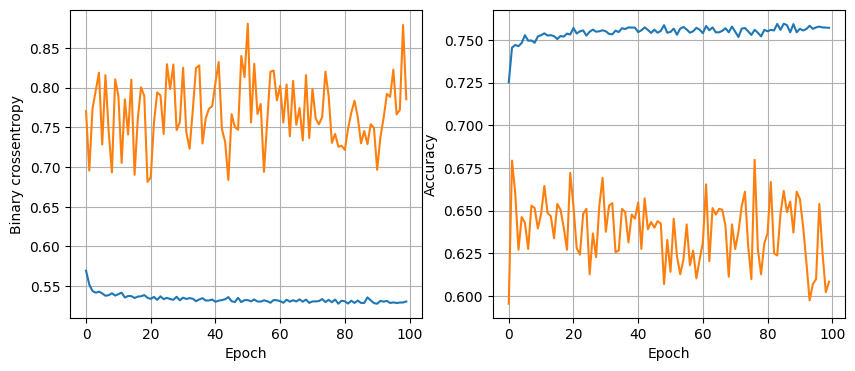

109/109 [==============================] - 0s 723us/step - loss: 0.5917 - accuracy: 0.7287
16 nodes, dropout 0.2, lr 0.005, batch size 64


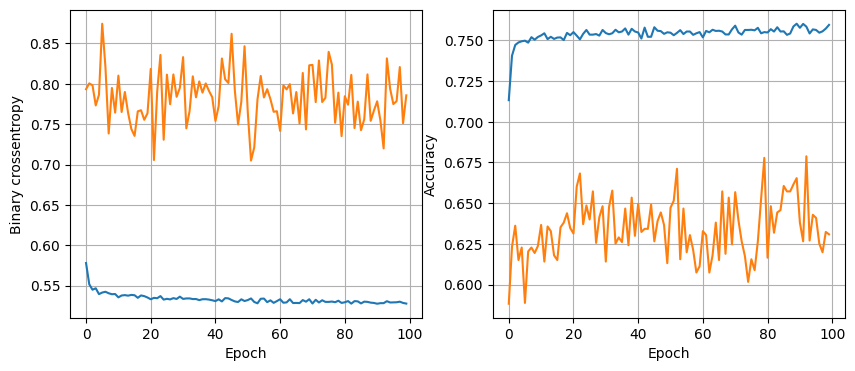

109/109 [==============================] - 0s 711us/step - loss: 0.5867 - accuracy: 0.7238
16 nodes, dropout 0.2, lr 0.005, batch size 128


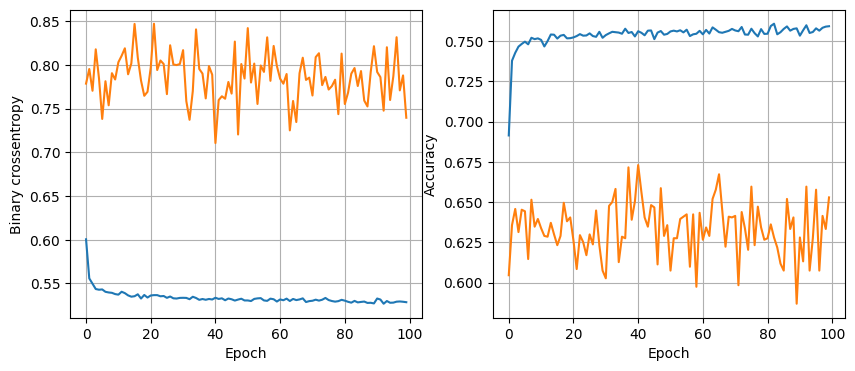

109/109 [==============================] - 0s 706us/step - loss: 0.5790 - accuracy: 0.7226
16 nodes, dropout 0.2, lr 0.001, batch size 32


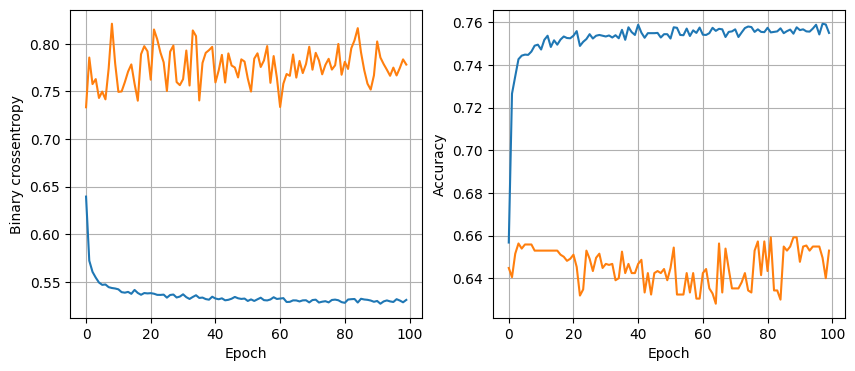

109/109 [==============================] - 0s 775us/step - loss: 0.5798 - accuracy: 0.7284
16 nodes, dropout 0.2, lr 0.001, batch size 64


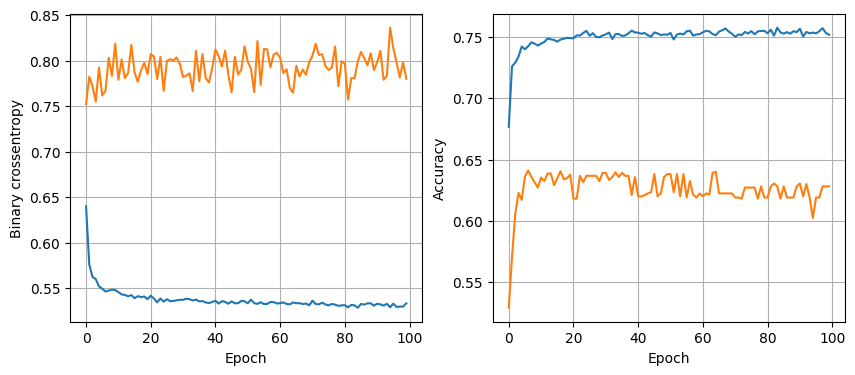

109/109 [==============================] - 0s 695us/step - loss: 0.5838 - accuracy: 0.7252
16 nodes, dropout 0.2, lr 0.001, batch size 128


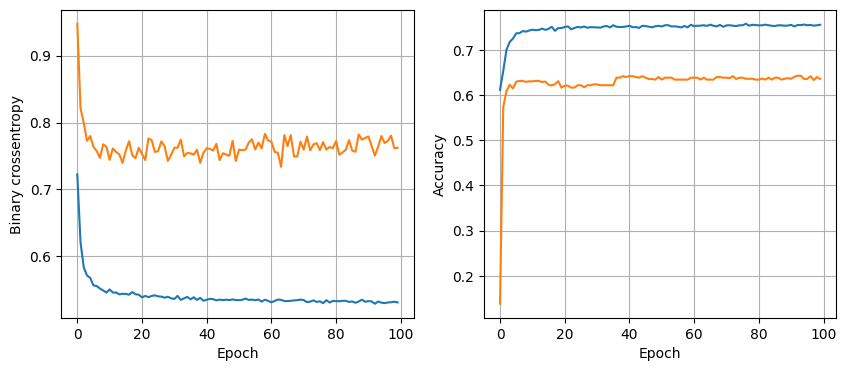

109/109 [==============================] - 0s 835us/step - loss: 0.5745 - accuracy: 0.7249
32 nodes, dropout 0, lr 0.005, batch size 32


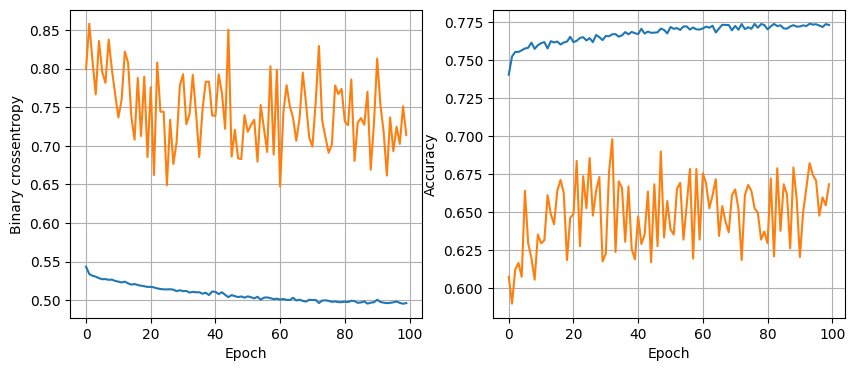

109/109 [==============================] - 0s 742us/step - loss: 0.7216 - accuracy: 0.7183
32 nodes, dropout 0, lr 0.005, batch size 64


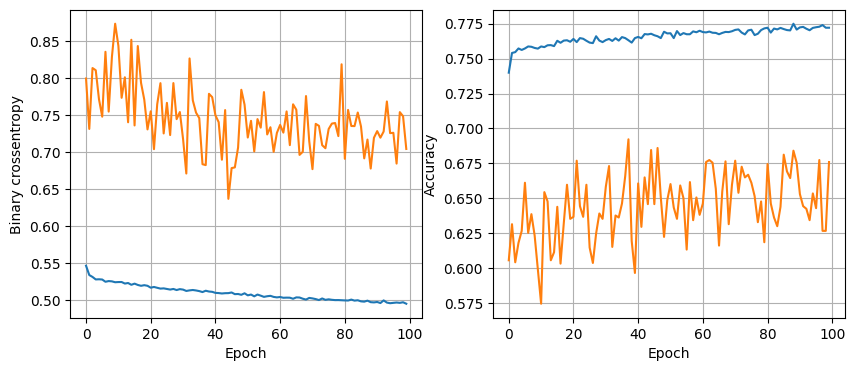

109/109 [==============================] - 0s 732us/step - loss: 0.7568 - accuracy: 0.7125
32 nodes, dropout 0, lr 0.005, batch size 128


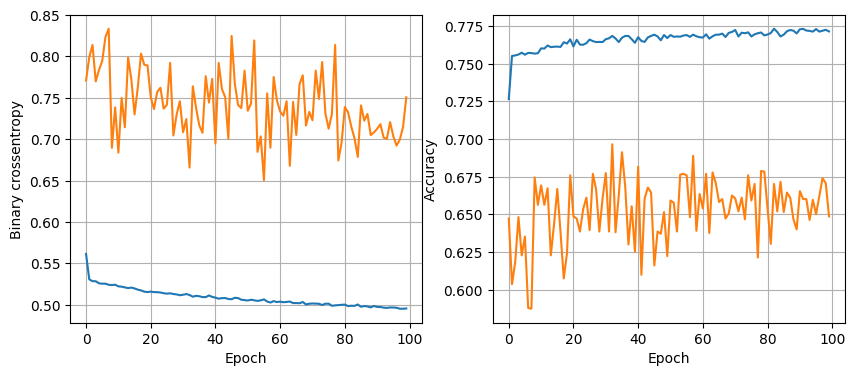

109/109 [==============================] - 0s 732us/step - loss: 0.6976 - accuracy: 0.7010
32 nodes, dropout 0, lr 0.001, batch size 32


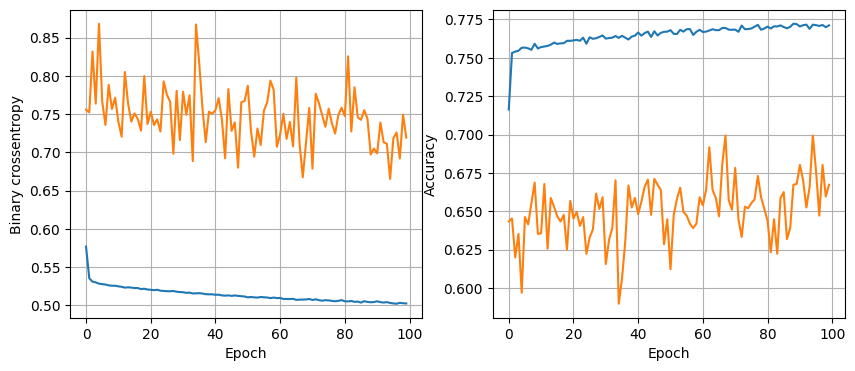

109/109 [==============================] - 0s 854us/step - loss: 0.6144 - accuracy: 0.7142
32 nodes, dropout 0, lr 0.001, batch size 64


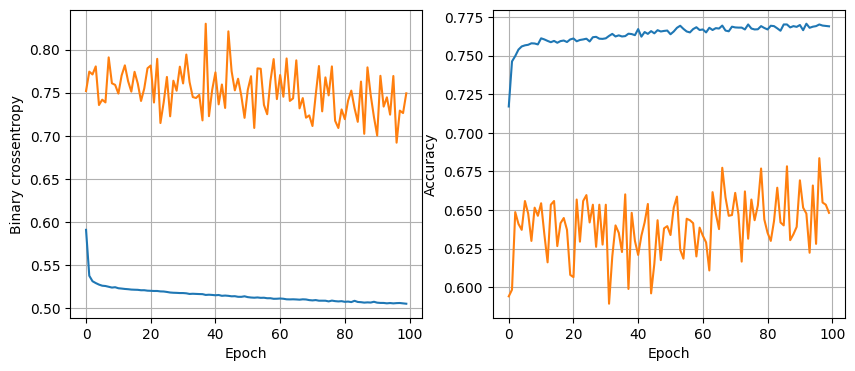

109/109 [==============================] - 0s 787us/step - loss: 0.6226 - accuracy: 0.7062
32 nodes, dropout 0, lr 0.001, batch size 128


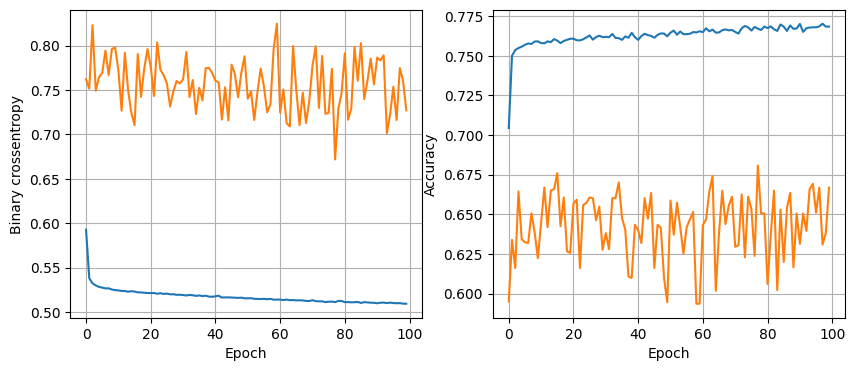

109/109 [==============================] - 0s 741us/step - loss: 0.5998 - accuracy: 0.6990
32 nodes, dropout 0.2, lr 0.005, batch size 32


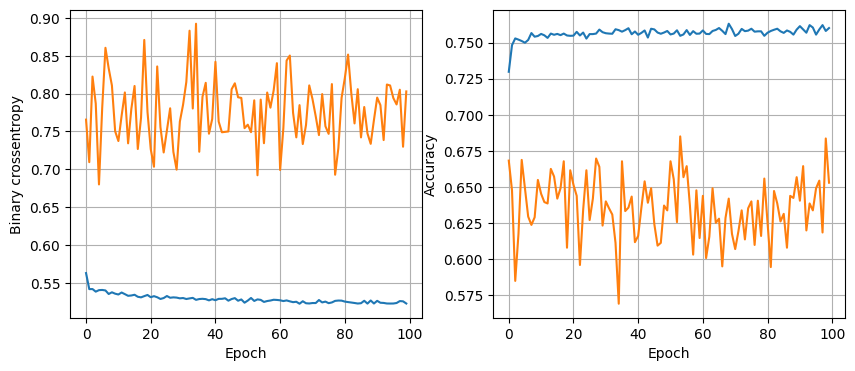

109/109 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7304
32 nodes, dropout 0.2, lr 0.005, batch size 64


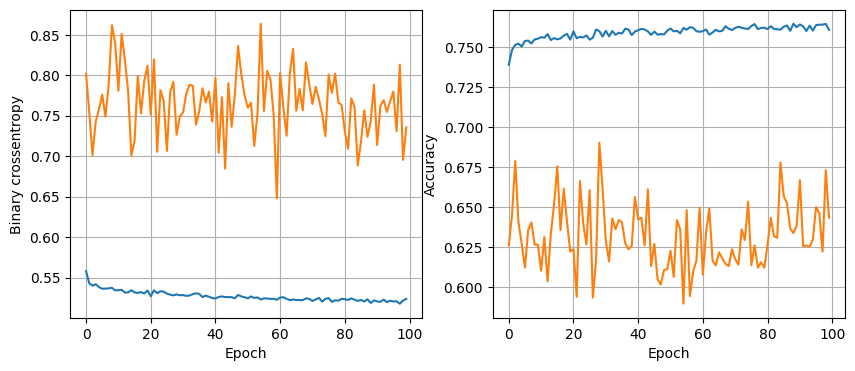

109/109 [==============================] - 0s 740us/step - loss: 0.5907 - accuracy: 0.7269
32 nodes, dropout 0.2, lr 0.005, batch size 128


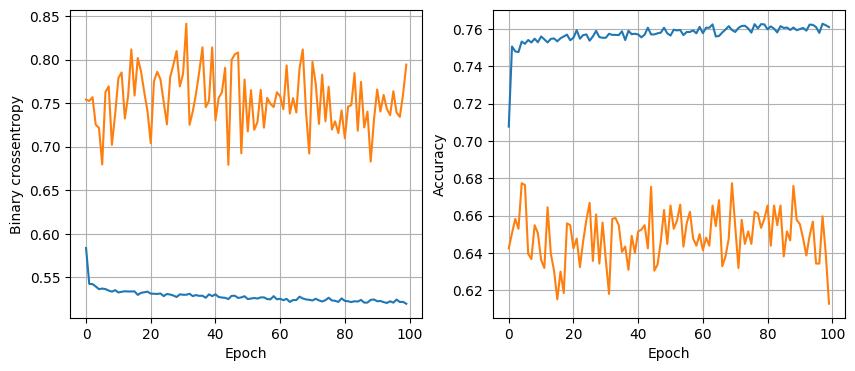

109/109 [==============================] - 0s 742us/step - loss: 0.6014 - accuracy: 0.7067
32 nodes, dropout 0.2, lr 0.001, batch size 32


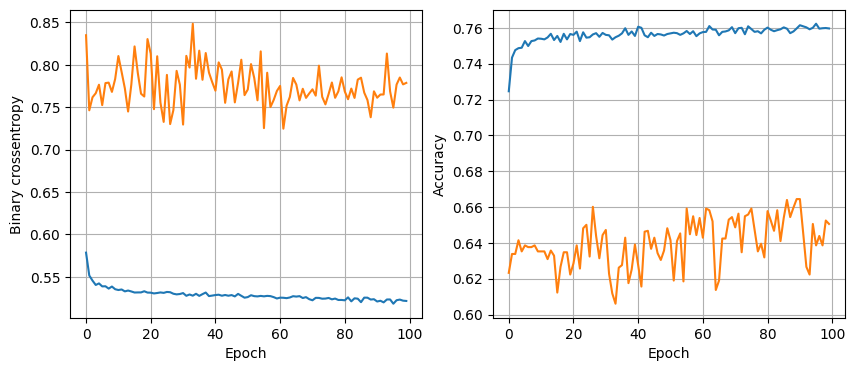

109/109 [==============================] - 0s 832us/step - loss: 0.5924 - accuracy: 0.7275
32 nodes, dropout 0.2, lr 0.001, batch size 64


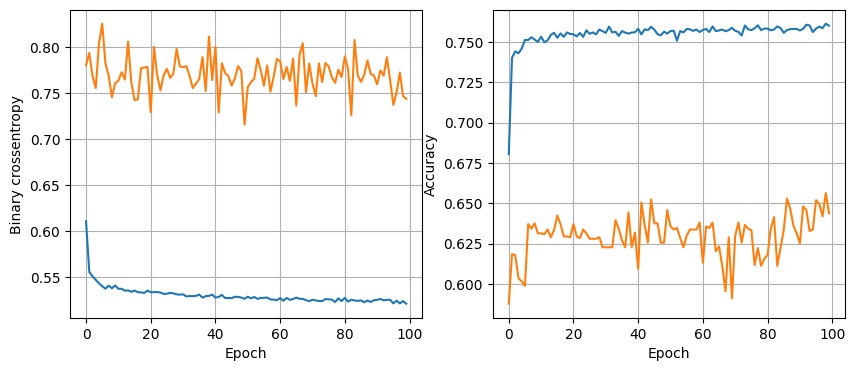

109/109 [==============================] - 0s 816us/step - loss: 0.5834 - accuracy: 0.7266
32 nodes, dropout 0.2, lr 0.001, batch size 128


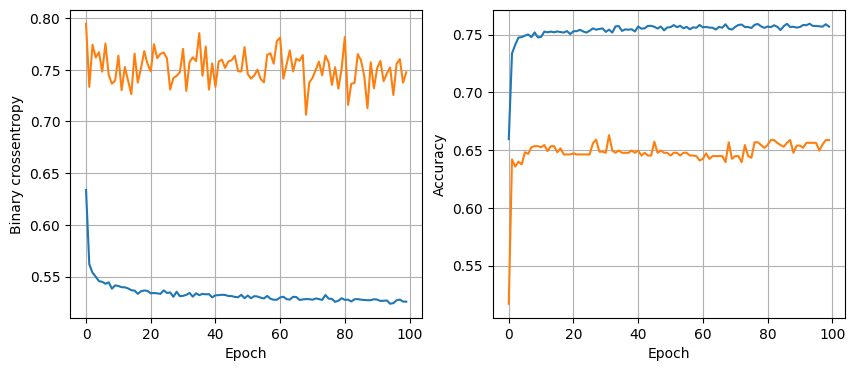

109/109 [==============================] - 0s 700us/step - loss: 0.5789 - accuracy: 0.7272


In [179]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [180]:
y_pred_NN = least_loss_model.predict(X_test)
y_pred_NN = (y_pred_NN > 0.5).astype(int).reshape(-1,) # flatten into 1D array

63/63 [==============================] - 2s 556us/step


In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.17      0.28      1721
           1       0.14      0.83      0.24       279

    accuracy                           0.26      2000
   macro avg       0.50      0.50      0.26      2000
weighted avg       0.76      0.26      0.28      2000

